In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
from pandas_datareader.data import DataReader
from datetime import datetime

C:\Users\Dell\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
# US recession periods
usrec = DataReader('USREC', 'fred', start=datetime(1999, 1, 29), end=datetime(2017, 8, 31))
# NBER constraction periods
datacons = pd.read_excel('constration.xlsx')
datacons.set_index(datacons['Date'], inplace=True)
datacons.set_index('Date', inplace=True)
dateparse = lambda datacons: pd.to_datetime(datacons, format='%m%d%Y')

In [13]:
# FDU -- data is the first difference of the return of MSCI USA index
data = pd.read_excel('FDU.xlsx')
data.set_index(data['Date'], inplace=True)
data.set_index('Date', inplace=True)
dateparse = lambda data: pd.to_datetime(data, format='%m%d%Y')


# Canada -- data is the first difference of the return of MSCI Canada index
Canada = pd.read_excel('RMC.xlsx')
Canada.set_index(Canada['Date'], inplace=True)
Canada.set_index('Date', inplace=True)
dateparse = lambda Canada: pd.to_datetime(Canada, format='%m%d%Y')

In [14]:
print data.head()
print Canada.head()

                USA
Date               
2/26/1999 -0.070259
3/31/1999  0.068753
4/30/1999 -0.004982
5/28/1999 -0.058829
6/30/1999  0.074993
             Canada
Date               
2/26/1999 -0.137227
3/31/1999  0.100188
4/30/1999  0.052903
5/28/1999 -0.124148
6/30/1999  0.074917


In [15]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test for stationarity:

def test_stationarity(timeseries):        
    
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [16]:
test_stationarity(data["USA"])
test_stationarity(Canada["Canada"])

Results of Dickey-Fuller Test:
Test Statistic                -8.976473e+00
p-value                        7.508385e-15
#Lags Used                     6.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (5%)           -2.875016e+00
Critical Value (1%)           -3.460992e+00
Critical Value (10%)          -2.573952e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.639658e+00
p-value                        5.469600e-14
#Lags Used                     9.000000e+00
Number of Observations Used    2.130000e+02
Critical Value (5%)           -2.875207e+00
Critical Value (1%)           -3.461429e+00
Critical Value (10%)          -2.574054e+00
dtype: float64


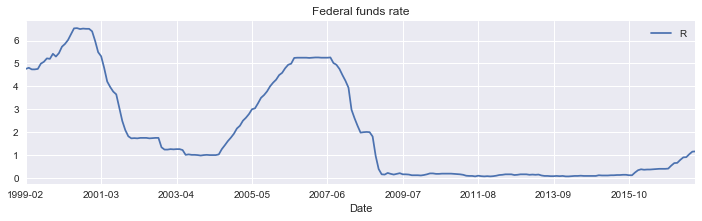

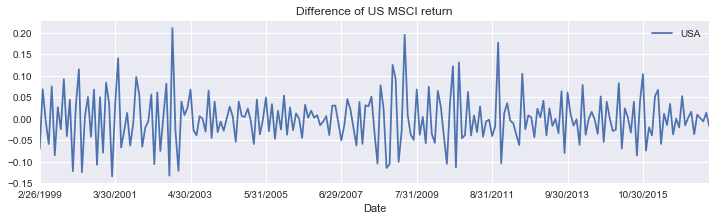

In [17]:
# Get the federal funds rate data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds
fed = pd.read_excel('Fed.xlsx')
fed.set_index(fed['Date'], inplace=True)
fed.set_index('Date', inplace=True)

# Plot the data
fed.plot(title='Federal funds rate', figsize=(12,3))
data.plot(title="Difference of US MSCI return" , figsize=(12,3))


In [23]:
#Model I for US without any switching component
mod1_US = sm.tsa.MarkovAutoregression(data, k_regimes=2, order=3, switching_ar=False)
res1_US = mod1_US.fit()
print (res1_US.summary())

#Model I for Canada without any switching component
mod1_Can = sm.tsa.MarkovAutoregression(Canada, k_regimes=2, order=3, switching_ar=False)
res1_Can = mod1_Can.fit()
print (res1_Can.summary())

                         Markov Switching Model Results                         
Dep. Variable:                      USA   No. Observations:                  220
Model:             MarkovAutoregression   Log Likelihood                 364.563
Date:                  Sun, 31 Dec 2017   AIC                           -713.126
Time:                          03:31:35   BIC                           -685.977
Sample:                      05-28-1999   HQIC                          -702.163
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.256e-05      0.006     -0.011      0.992      -0.012       0.011
                             Regime 

In [16]:
# Model II for USA with switching AR term
mod2_US = sm.tsa.MarkovAutoregression(data, k_regimes=2, order=3, switching_ar=True)
res2_US = mod2_US.fit()
print (res2_US.summary())

# Model II for Canada with switching AR term
mod2_Can = sm.tsa.MarkovAutoregression(Canada, k_regimes=2, order=3, switching_ar=True)
res2_Can = mod2_Can.fit()
print (res2_Can.summary())

                         Markov Switching Model Results                         
Dep. Variable:                      USA   No. Observations:                  220
Model:             MarkovAutoregression   Log Likelihood                 372.610
Date:                  Sun, 31 Dec 2017   AIC                           -723.220
Time:                          00:34:22   BIC                           -685.890
Sample:                      05-28-1999   HQIC                          -708.145
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.007      0.890      0.373      -0.007       0.019
ar.L1         -0.5906      0.185    

In [24]:
# Model III for USA with switching AR and variance terms
mod3_USA = sm.tsa.MarkovAutoregression(data, k_regimes=2, order=3, switching_ar=True, switching_variance=True)
res3_USA = mod3_USA.fit()
print (res3_USA.summary())

# Model III for Canada with switching AR and variance terms
mod3_Can = sm.tsa.MarkovAutoregression(Canada, k_regimes=2, order=3, switching_ar=True, switching_variance=True)
res3_Can = mod3_Can.fit()
print (res3_Can.summary())

                         Markov Switching Model Results                         
Dep. Variable:                      USA   No. Observations:                  220
Model:             MarkovAutoregression   Log Likelihood                 385.927
Date:                  Sun, 31 Dec 2017   AIC                           -747.855
Time:                          03:32:04   BIC                           -707.131
Sample:                      05-28-1999   HQIC                          -731.409
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.002     -0.235      0.814      -0.005       0.004
sigma2         0.0034      0.000    

In [25]:
# downloading parapeters
US_parameters=res3_USA.params
Can_parameters=res3_Can.params

In [27]:
writer = pd.ExcelWriter('params.xlsx', engine='xlsxwriter')
   
US_parameters.to_excel(writer, 'Sheet1')
Can_parameters.to_excel(writer, 'Sheet2')

writer.save()

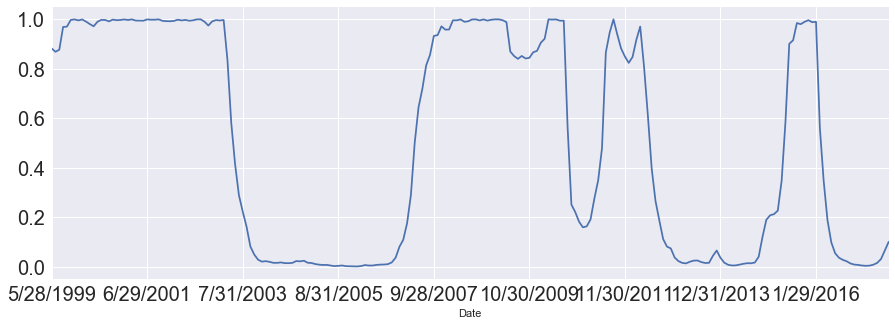

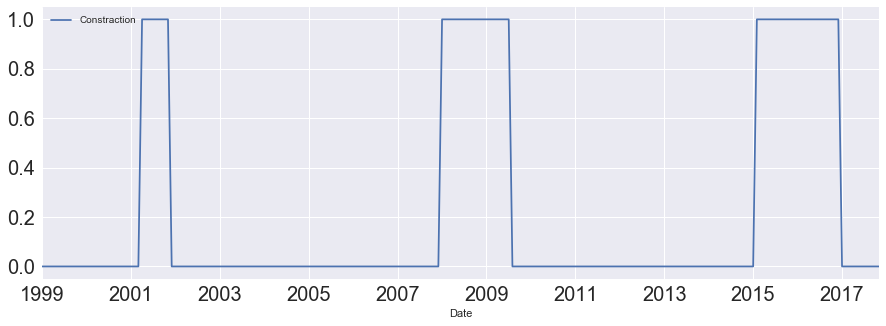

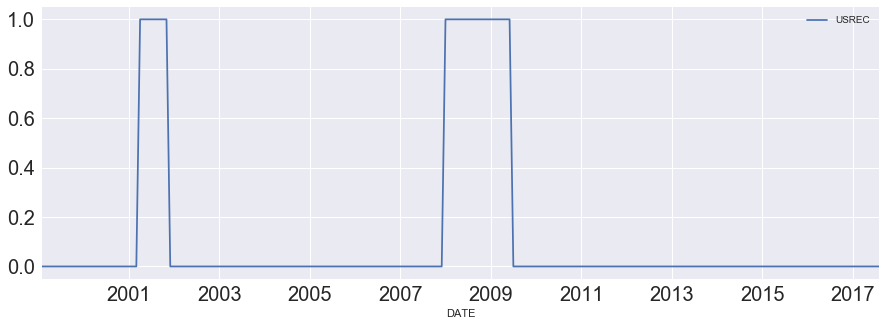

In [28]:
# smoothed probabilities for each country
res3_USA.smoothed_marginal_probabilities[0].plot(figsize=(15,5), fontsize=20)
datacons.plot(figsize=(15,5), fontsize=20)
usrec.plot(figsize=(15,5), fontsize=20)


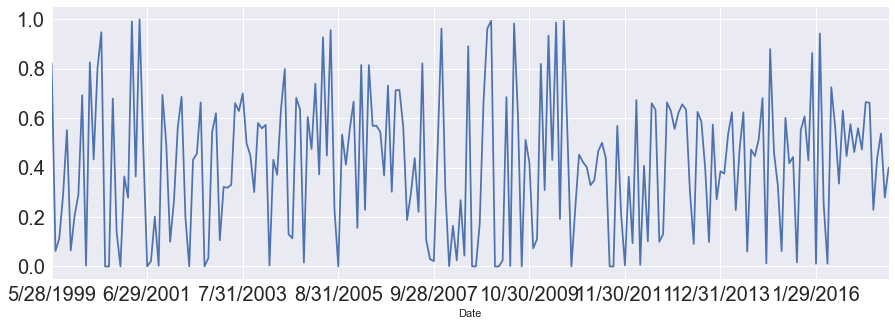

In [26]:
res3_Can.smoothed_marginal_probabilities[1].plot(figsize=(15,5), fontsize=20)

In [31]:
state0inUS=res3_USA.smoothed_marginal_probabilities[0]
state0inCan=res3_Can.smoothed_marginal_probabilities[0]

print state0inUS.tail(1)
print state0inCan.tail(1)

Date
8/31/2017    0.101428
Name: 0, dtype: float64
Date
8/31/2017    0.600582
Name: 0, dtype: float64


In [33]:
# Model IV for US with conditional information
mod4_US = sm.tsa.MarkovAutoregression(
    data.ix[1:, 'USA'], k_regimes=2, order=3, switching_ar= True, switching_variance=True,
    exog_tvtp=sm.add_constant(fed.ix[1:, 'R']))
res4_US=mod4_US.fit()
print(res4_US.summary())

                         Markov Switching Model Results                         
Dep. Variable:                      USA   No. Observations:                  219
Model:             MarkovAutoregression   Log Likelihood                 387.787
Date:                  Sun, 31 Dec 2017   AIC                           -747.574
Time:                          01:18:56   BIC                           -700.127
Sample:                      06-30-1999   HQIC                          -728.411
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.385      0.700      -0.003       0.002
sigma2         0.0006      0.000    